<a href="https://colab.research.google.com/github/youngstar152/Time-series-analysis/blob/main/Optimal_Multi_scale_Patterns_in_Time_Series_Streams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 情報システム工学演習I

## 例題 ex02
- 例題1. SVDを使って簡単な行列を分解してみる
- 例題2. 時系列データ（人工データ）を用いたSVDに基づく特徴抽出
- 例題3. 時系列データ（google trends）を用いたSVDに基づく特徴抽出


### 例題1. SVDを使って簡単な行列を分解してみる


In [2]:
# 準備：各種インポート
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg


#### (2-1) データの作成

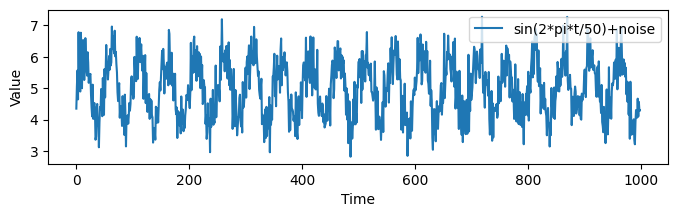

In [92]:
# 時系列データ（人工データ）の作成  x(t) = sin(2pi*t/50)+e, where, e=Gauss(5,0.5)
from random import gauss
noise  = [gauss(5.0, 0.5) for i in range(1000)]
time   = np.arange(0, 1000, 1);
X = np.sin(2 * np.pi * time / 50) + noise
# 生成した時系列データの可視化
plt.figure(figsize=(8,2))
plt.plot(X, label='sin(2*pi*t/50)+noise')
plt.xlabel('Time'); plt.ylabel('Value')
plt.legend()

#### (2-2) SVDを用いた行列分解

In [93]:
# 部分シーケンス行列 Xw (delay coordinates matrix) を作成する関数
# plase also see def 1 & procedure 1
def delay_coordinates(X, w):
  m  = len(X) # m: sequence length len_X = len(X)
  mp = int(np.floor(m / w))
  Xw = np.zeros((mp, w))  # matrix Xw --- size:[mp x w]
  for t in range(1, mp+1):  # t = (1, ..., mp)
    Xw[t-1,:] = X[(t-1)*w:t*w]
  return Xw

def my_svd(Xw, k):
  # 特異値分解 - decompose Xw -> (U, s, Vh)
  [U, s, Vh] = linalg.svd(Xw, full_matrices=False)
  print(f'matrices [U * s * Vh] --- size: U:{U.shape}, s:{s.shape}, Vh:{Vh.shape}')
  # top-k成分を使った近似 - low-rank approximation
  U_k = U[:,0:k]; s_k = s[0:k]; Vh_k = Vh[0:k,:]
  pi= (sum(s_k[k:]**2))/w
  return (U_k, s_k, Vh_k ,pi)


In [94]:
# 時系列データ (1次元)とウィンドウサイズwに対し、k個の重要な特徴的パターンを抽出し、可視化する関数
def svd_decomp(X, w, k, minus=False):
  # (a) 部分シーケンス行列 Xw (delay coordinates matrix) の作成
  Xw = delay_coordinates(X, w) # 部分シーケンス行列を作成
  print(f'create delay coordinates matrix (w={w}),   X: {X.shape} ->  Xw: {Xw.shape}')
  # (b) SVDを用いた行列分解
  (U, s, Vh, pi) = my_svd(Xw, k)
  print(f'top-k decomposed matrices [U * s * Vh] --- size: U:{U.shape}, s:{s.shape}, Vh:{Vh.shape}')
  # (c) 特徴抽出結果の可視化
  if(minus): U*=-1; Vh*=-1 # 必要なら成分の符号を反転させる (可視化のため)
  # ---------------------------- #
  plt.figure(figsize=(6,6))
  colors = ['orange', 'green', 'purple', 'skyblue', 'pink']
  # ---------------------------- #
  plt.subplot(k+1,1,1)

  # (c-i) オリジナルデータとシーケンス分割の可視化
  plt.plot(X)
  for t in range(0,len(Xw)+1):
    plt.axvline(x = t*w, color = 'gray', linestyle='dashed')
  plt.xlabel(f'Time (window size w={w})')
  plt.title(f'Original Sequence X (len={len(X)})')
  # ---------------------------- #

  # (c-ii) 特徴抽出結果 (projection matrix P = U x s)
  for i in range(0,k):
    plt.subplot(k+1,1,i+2)
    plt.stem(U[:,i]*s[i], 'x--', linefmt=colors[i])
    plt.xlabel(f't-th subsequence Xw(t) (t=1,...,{len(Xw)})')
    plt.title(f'Projection matrix P[{i}] = U[{i}]*s[{i}]')
  plt.tight_layout()

  # ---------------------------- #
  # (c-iii) 特徴抽出結果 (Local patterns Vh)
  plt.figure(figsize=(6,2))
  for i in range(0,k):
    plt.subplot(1,k,i+1)
    plt.plot(Vh[i,:], '+-', color=colors[i])
    plt.xlabel(f'Time (window size w={w})')
    plt.title(f'Local patterns Vh[{i}]')
  plt.tight_layout()


create delay coordinates matrix (w=50),   X: (1000,) ->  Xw: (20, 50)
matrices [U * s * Vh] --- size: U:(20, 20), s:(20,), Vh:(20, 50)
top-k decomposed matrices [U * s * Vh] --- size: U:(20, 2), s:(2,), Vh:(2, 50)


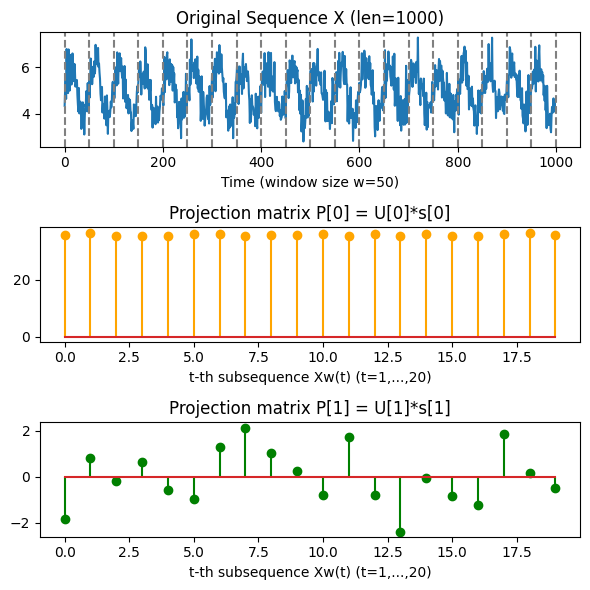

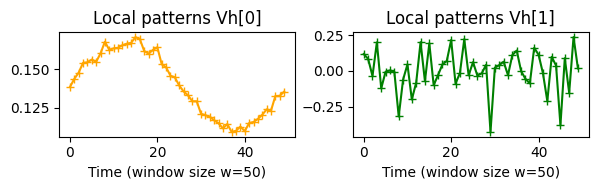

In [95]:
# SVDを用いた特徴抽出
w = 50 # ウィンドウ幅 50 - window size w
k = 2 # k: 上位 k = 2 個の成分のみ使用
svd_decomp(X, w, k, minus=True)

In [96]:
def my_svd2(Xw, k,X):
  # 特異値分解 - decompose Xw -> (U, s, Vh)
  [U, s, Vh] = linalg.svd(Xw, full_matrices=False)
  # top-k成分を使った近似 - low-rank approximation
  U_k = U[:,0:k]; s_k = s[0:k]; Vh_k = Vh[0:k,:]
  return (U_k, s, Vh_k)

# top-k成分のみを使ったオリジナルデータの近似 - reconstract Xw using top-k components
def power_profile(X, w, k):
 # (a) 部分シーケンス行列 Xw (delay coordinates matrix) の作成
  Xw = delay_coordinates(X, w) # 部分シーケンス行列を作成
  #print(f'create delay coordinates matrix (w={w}),   X: {X.shape} ->  Xw: {Xw.shape}')
  # (b) SVDを用いた行列分解
  (U, s, Vh) = my_svd2(Xw, k,X)
  error=sum(s[k:]**2)/w
  return error

In [97]:
k=1
pi1_list = []
for w in range(5, 400):
  pi=power_profile(X,w,k)
  pi1_list.append(pi)

In [98]:
k=3
pi3_list = []
for w in range(5, 400):
  pi=power_profile(X,w,k)
  pi3_list.append(pi)

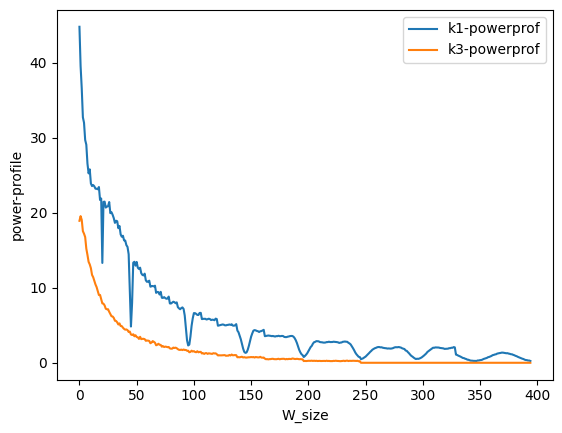

In [99]:
plt.plot(pi1_list,label="k1-powerprof")
plt.plot(pi3_list,label="k3-powerprof")
plt.xlabel("W_size")
plt.ylabel("power-profile")
#plt.xlim(2, 60)
plt.legend()
plt.show()

#### (2-3) SVDを用いた近似

In [30]:
import numpy as np
from numpy import linalg as LA
# top-k成分のみを使ったオリジナルデータの近似 - reconstract Xw using top-k components
def reconstruct(X, w, k):
 # (a) 部分シーケンス行列 Xw (delay coordinates matrix) の作成
  Xw = delay_coordinates(X, w) # 部分シーケンス行列を作成
  print(f'create delay coordinates matrix (w={w}),   X: {X.shape} ->  Xw: {Xw.shape}')
  # (b) SVDを用いた行列分解
  (U, s, Vh,pi) = my_svd(Xw, k)

  # (c) 分解した行列を用いたオリジナルデータの復元と可視化
  plt.figure(figsize=(6,6))
  plt.subplot(k+1, 1, 1)
  plt.plot(X); plt.title(f'Original sequence X')
  #gosa_list=[]
  for i in range(1,k+1):
    plt.subplot(k+1,1,1+i)
    # i個の成分のみ選択して近似
    U_k = U[:,0:i]; s_k = s[0:i]; Vh_k = Vh[0:i,:]
    Xw_rec  = np.dot(np.dot(U_k, np.diag(s_k)),Vh_k) # delay coordinates matrix
    X_rec   = Xw_rec.flatten() # reconstracted sequence
    #gosa=X-X_rec
    #gosa_norm=LA.norm(gosa,"fro")
    #gosa_list.append([i,gosa_norm])
    plt.plot(X_rec, color='gray')
    plt.title(f'Reconstruction X_rec  (k={i})')
  plt.tight_layout()
  #return gosa_list



create delay coordinates matrix (w=50),   X: (1000,) ->  Xw: (20, 50)
matrices [U * s * Vh] --- size: U:(20, 20), s:(20,), Vh:(20, 50)


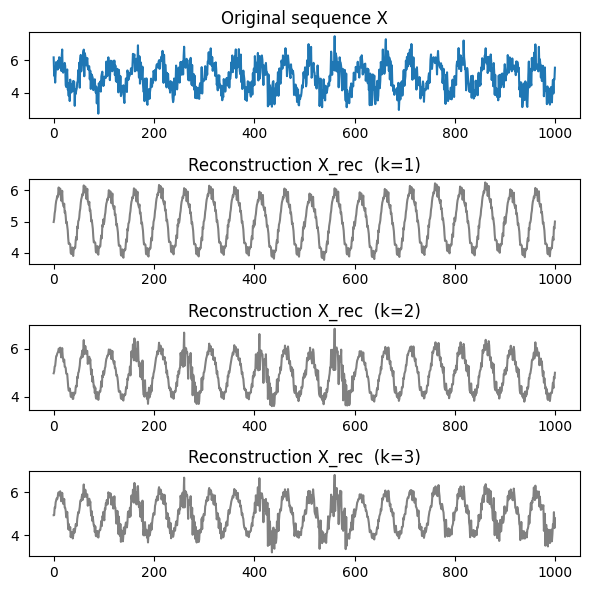

In [31]:

# SVDの行列分解を用いたオリジナルデータの近似を可視化
reconstruct(X ,w=50,k=3)

### 例題3. 実データ ( google trends) を用いた用いたSVDに基づく特徴抽出



#### (3-1) データのダウンロード

In [100]:
import numpy as np
import pandas as pd # import pandas

<Axes: xlabel='Month'>

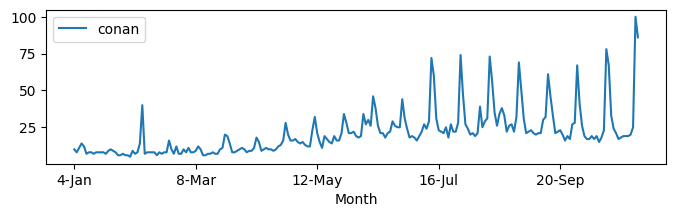

In [156]:
# キーワード：「olympic」を解析
fn='/content/konan_movie.csv' # ファイル名を指定
#fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_olympic.csv'
index_col = 'Month' # インデックスを指定
df = pd.read_csv(fn, header=2, index_col=index_col, parse_dates=True)
df.plot(figsize=(8,2)) #可視化 (figure)

In [157]:
X = df['conan'].to_numpy()

#### (3-2) SVDを用いた行列分解

create delay coordinates matrix (w=12),   X: (233,) ->  Xw: (19, 12)
matrices [U * s * Vh] --- size: U:(19, 12), s:(12,), Vh:(12, 12)
top-k decomposed matrices [U * s * Vh] --- size: U:(19, 3), s:(3,), Vh:(3, 12)


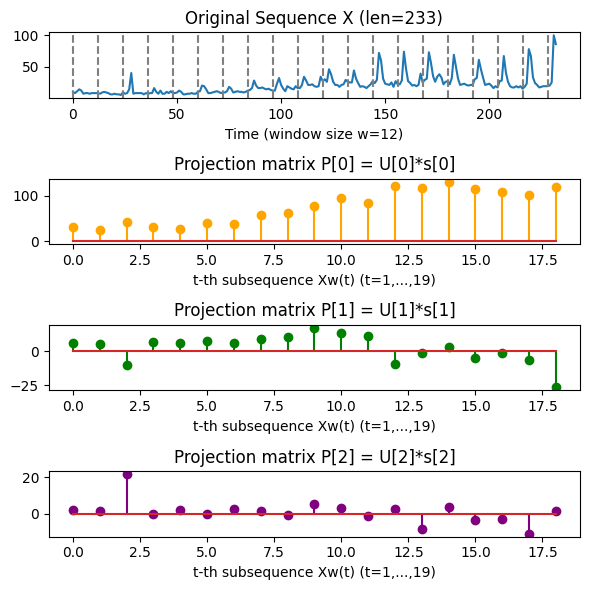

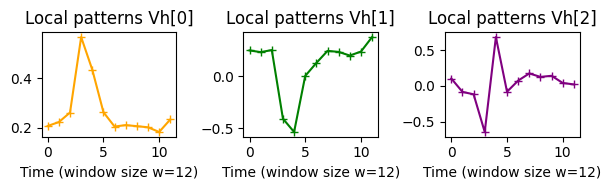

In [103]:
w = 12 # ウィンドウ幅 12 months - window size w
k = 3  # k: 上位 k = 3 個の成分のみ使用
svd_decomp(X, w, k, minus=True)

In [82]:
k=1
pi1_list = [None,None]
down1_list=[]
before=10000
for w in range(2, 60):
  pi=power_profile(X,w,k)
  #print(w,pi)
  pi1_list.append(pi)
  sabun=before-pi
  if sabun>=350:
    down1_list.append(w)
  before=pi

In [83]:
k=3
pi3_list = [None,None]
down3_list=[]
before=10000
for w in range(2, 60):
  pi=power_profile(X,w,k)
  #print(w,pi)
  pi3_list.append(pi)
  sabun=before-pi
  if sabun>=350:
    down3_list.append(w)
  before=pi

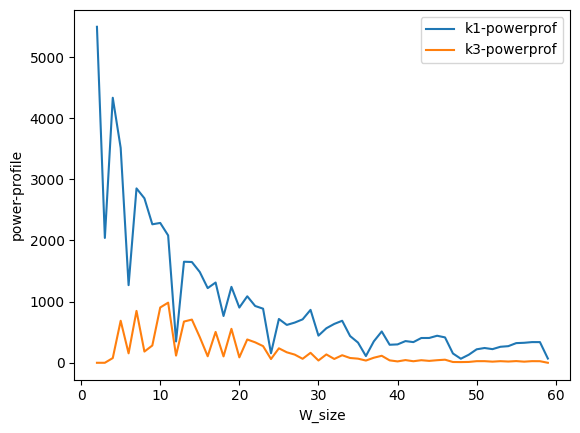

In [91]:
plt.plot(pi1_list,label="k1-powerprof")
plt.plot(pi3_list,label="k3-powerprof")
plt.xlabel("W_size")
plt.ylabel("power-profile")
#plt.xlim(2, 60)
plt.legend()
plt.show()

In [86]:
print(down1_list)

[2, 3, 5, 6, 9, 12, 18, 24, 30]


In [108]:
fn2='/content/doraemon.csv' # ファイル名を指定
fn3='/content/natuyasumi.csv' # ファイル名を指定
#fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_olympic.csv'
index_col = 'Month' # インデックスを指定

df2 = pd.read_csv(fn2, header=2, index_col=index_col, parse_dates=True)
df3 = pd.read_csv(fn3, header=2, index_col=index_col, parse_dates=True)
df["doraemon"]=df2
df["natsu-yasumi"]=df3
df

,conan,doraemon,natsu-yasumi
Month,,,
4-Jan,10,33,5
4-Feb,8,42,4
4-Mar,11,50,8
4-Apr,14,38,8
4-May,12,33,9
...,...,...,...
23-Jan,19,27,5
23-Feb,20,33,6
23-Mar,25,54,8


<Axes: xlabel='Month'>

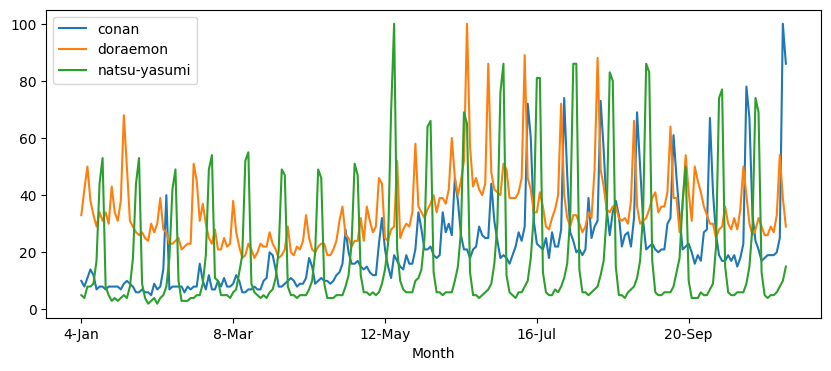

In [111]:
df.plot(figsize=(10,4)) #可視化 (figure)

In [112]:
a=[[2,3,4],[2,2,2]]
len(a)

2

In [113]:
X1 = df['conan'].to_numpy()
X2 = df['doraemon'].to_numpy()
X3 = df['natsu-yasumi'].to_numpy()

In [180]:
X_total=(X1+X2+X3)/3

create delay coordinates matrix (w=12),   X: (233,) ->  Xw: (19, 12)
matrices [U * s * Vh] --- size: U:(19, 12), s:(12,), Vh:(12, 12)
top-k decomposed matrices [U * s * Vh] --- size: U:(19, 3), s:(3,), Vh:(3, 12)


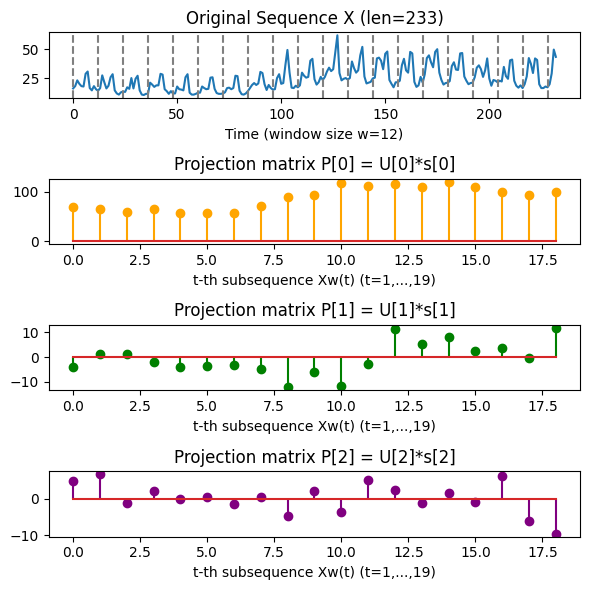

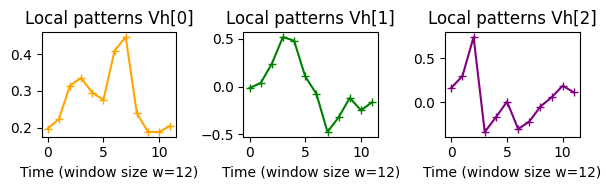

In [181]:
w = 12 # ウィンドウ幅 12 months - window size w
k = 3  # k: 上位 k = 3 個の成分のみ使用
svd_decomp(X_total, w, k, minus=True)

create delay coordinates matrix (w=12),   X: (233,) ->  Xw: (19, 12)
matrices [U * s * Vh] --- size: U:(19, 12), s:(12,), Vh:(12, 12)


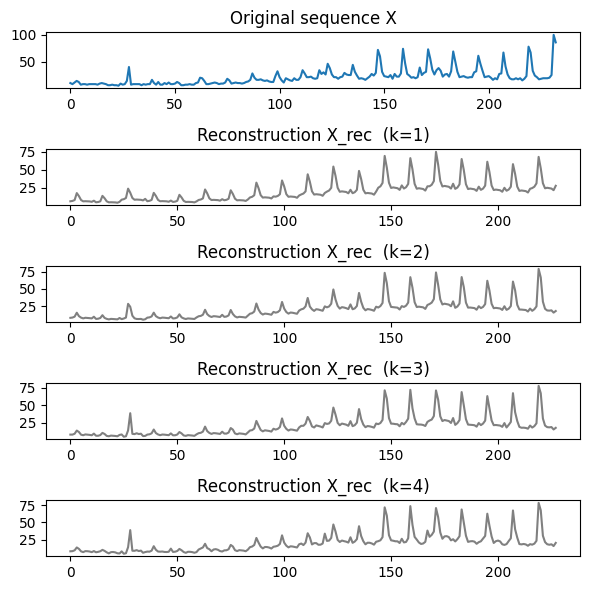

In [182]:
# SVDの行列分解を用いたオリジナルデータの近似を可視化
reconstruct(X ,w=12,k=4)

In [176]:
def delay_coordinates2(X, w):
  m  = len(X) # m: sequence length len_X = len(X)
  mp = int(np.floor(m / w))
  Xw = np.zeros((mp, w))  # matrix Xw --- size:[mp x w]
  for t in range(1, mp+1):  # t = (1, ..., mp)
    Xw[t-1,:] = X[(t-1)*w:t*w]
  return Xw

Xw1=delay_coordinates2(X1,12)
Xw2=delay_coordinates2(X2,12)
Xw3=delay_coordinates2(X3,12)
print(Xw1.shape)

Xw_total=np.array([Xw1,Xw2,Xw3])
print(Xw_total.shape)

(19, 12)
(3, 19, 12)


In [174]:
Xw_total

array([[[ 10.,  33.,   5.],
        [  8.,  31.,   3.],
        [  9.,  27.,   4.],
        [  7.,  23.,   4.],
        [  8.,  22.,   5.],
        [ 10.,  22.,   5.],
        [  9.,  21.,   5.],
        [ 12.,  24.,   5.],
        [ 12.,  27.,   6.],
        [ 16.,  29.,   6.],
        [ 27.,  37.,   6.],
        [ 26.,  40.,   5.],
        [ 27.,  41.,   6.],
        [ 22.,  35.,   7.],
        [ 25.,  32.,   6.],
        [ 27.,  30.,   6.],
        [ 21.,  36.,   6.],
        [ 17.,  41.,   6.],
        [ 15.,  28.,   6.]],

       [[  8.,  42.,   4.],
        [  7.,  38.,   4.],
        [  7.,  30.,   2.],
        [  8.,  51.,   4.],
        [  8.,  23.,   4.],
        [ 11.,  22.,   4.],
        [  9.,  24.,   5.],
        [ 13.,  31.,   5.],
        [ 12.,  29.,   5.],
        [ 16.,  34.,   6.],
        [ 30.,  42.,   6.],
        [ 25.,  44.,   6.],
        [ 24.,  46.,   6.],
        [ 22.,  40.,   6.],
        [ 29.,  49.,   7.],
        [ 22.,  38.,   7.],
        [ 30.,  41

In [177]:
# (b) SVDを用いた行列分解
(U, s, Vh,pi) = my_svd(Xw_total, 3)

# (c) 分解した行列を用いたオリジナルデータの復元と可視化
plt.figure(figsize=(6,6))
plt.subplot(k+1, 1, 1)
plt.plot(X); plt.title(f'Original sequence X')
#gosa_list=[]
for i in range(1,k+1):
  plt.subplot(k+1,1,1+i)
  # i個の成分のみ選択して近似
  U_k = U[:,0:i]; s_k = s[0:i]; Vh_k = Vh[0:i,:]
  Xw_rec  = np.dot(np.dot(U_k, np.diag(s_k)),Vh_k) # delay coordinates matrix
  X_rec   = Xw_rec.flatten() # reconstracted sequence
  #gosa=X-X_rec
  #gosa_norm=LA.norm(gosa,"fro")
  #gosa_list.append([i,gosa_norm])
  plt.plot(X_rec, color='gray')
  plt.title(f'Reconstruction X_rec  (k={i})')
plt.tight_layout()

ValueError: ignored

In [ ]:
def my_svd(Xw, k):
  # 特異値分解 - decompose Xw -> (U, s, Vh)
  [U, s, Vh] = linalg.svd(Xw, full_matrices=False)
  print(f'matrices [U * s * Vh] --- size: U:{U.shape}, s:{s.shape}, Vh:{Vh.shape}')
  # top-k成分を使った近似 - low-rank approximation
  U_k = U[:,0:k]; s_k = s[0:k]; Vh_k = Vh[0:k,:]
  pi= (sum(s_k[k:]**2))/w
  return (U_k, s_k, Vh_k ,pi)

In [115]:
w = 12 # ウィンドウ幅 12 months - window size w
k = 3  # k: 上位 k = 3 個の成分のみ使用
svd_decomp(X_total, w, k, minus=True)

ValueError: ignored

In [ ]:
k=1
pi1_list = [None,None]
down1_list=[]
before=10000
for w in range(2, 60):
  pi=power_profile(X,w,k)
  #print(w,pi)
  pi1_list.append(pi)
  sabun=before-pi
  if sabun>=350:
    down1_list.append(w)
  before=pi

In [145]:
def reconstruct2(X, w, k):
 # (a) 部分シーケンス行列 Xw (delay coordinates matrix) の作成
  Xw = delay_coordinates(X, w) # 部分シーケンス行列を作成
  print(f'create delay coordinates matrix (w={w}),   X: {X.shape} ->  Xw: {Xw.shape}')
  # (b) SVDを用いた行列分解
  (U, s, Vh,pi) = my_svd(Xw, k)

  # (c) 分解した行列を用いたオリジナルデータの復元と可視化
  plt.figure(figsize=(6,6))
  plt.subplot(k+1, 1, 1)
  plt.plot(X); plt.title(f'Original sequence X')
  gosa_list=[]
  for i in range(1,k+1):
    #plt.subplot(k+1,1,1+i)
    # i個の成分のみ選択して近似
    U_k = U[:,0:i]; s_k = s[0:i]; Vh_k = Vh[0:i,:]
    Xw_rec  = np.dot(np.dot(U_k, np.diag(s_k)),Vh_k) # delay coordinates matrix
    X_rec   = Xw_rec.flatten() # reconstracted sequence
    X=X[0:len(X_rec)]
    gosa=X-X_rec
    gosa_norm=np.sqrt(sum([i**2 for i in gosa]))
    #gosa_norm=LA.norm(gosa,"fro")
    gosa_list.append(gosa_norm)
    plt.plot(X_rec, color='gray')
    plt.title(f'Reconstruction X_rec  (k={i})')
  plt.tight_layout()
  return gosa_list

create delay coordinates matrix (w=12),   X: (233,) ->  Xw: (19, 12)
matrices [U * s * Vh] --- size: U:(19, 12), s:(12,), Vh:(12, 12)


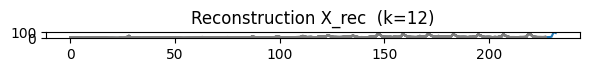

In [146]:
gosa=reconstruct2(X, 12, 12)

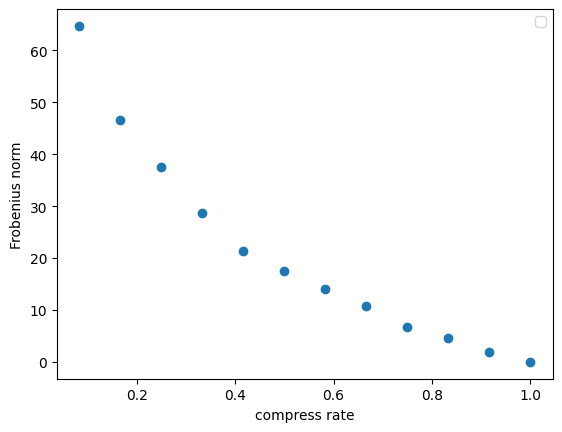

In [144]:
comp=[(i+1)/12 for i in range(12)]

plt.scatter(comp,gosa)
plt.xlabel("compress rate")
plt.ylabel("Frobenius norm")
#plt.xlim(2, 60)
plt.legend()
plt.show()

In [119]:
import numpy as np

# 例として3x3の行列を作成
A = np.array([[2, 2, 2],
              [1, 1, 1]]
              )

# フロベニウスノルムの計算
norm = np.linalg.norm(A, 'fro')

print(norm)

3.872983346207417


create delay coordinates matrix (w=12),   X: (233,) ->  Xw: (19, 12)
matrices [U * s * Vh] --- size: U:(19, 12), s:(12,), Vh:(12, 12)


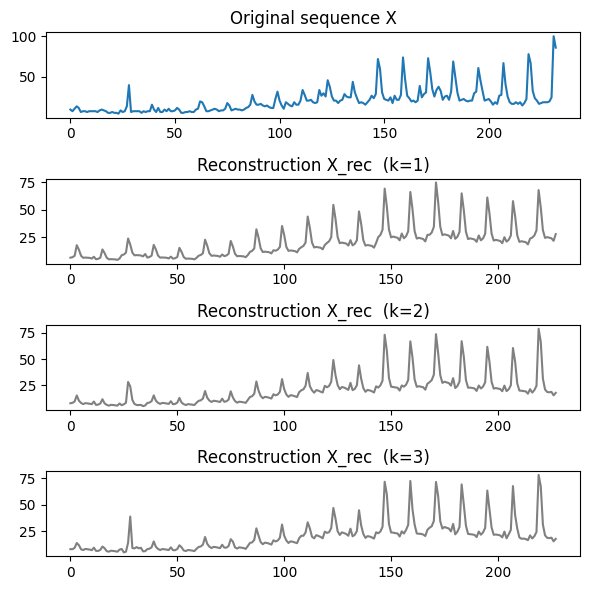

In [49]:
# SVDの行列分解を用いたオリジナルデータの近似を可視化
reconstruct(X, w=12,k=3)

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd

In [164]:
def delay(X, w):
    m = X.shape[0]//w
    n = w if len(X.shape) == 1 else X.shape[1]*w
    _X = np.zeros((m, n))
    for i in range(m):
        _X[i, :] = X[i*w:(i+1)*w].reshape(1, -1)

    return _X

def local_pattern(X, w, k):
    X_w = delay(X, w)
    u, s, v = svd(X_w, full_matrices=False)
    s_matrix = np.diag(s[:k])
    pi = sum(s[k:]**2)/w

    return v[:k].round(2), (u[:, :k] @ s_matrix).round(2), s_matrix.round(2), pi

def hierarchical_svd(X, w_0, W, L, k, verbose=True):
    pi_dict = dict()
    if verbose:
        print(f"original len(X) : {len(X)}")
        print("----------------------------------------------------------------------------")
    V0_ls = []
    V, P, _, pi = local_pattern(X, w_0, k)
    V0_ls.append(V.T)
    pi_dict[w_0] = pi
    if verbose:
        print("【L = 0】")
        print(f"window size        : {w_0}")
        print(f"time-delay         : X → X^(w_0, 0)")
        print(f"time-delay (shape) : ({len(X)}, 1) → ({len(X)//w_0}, {w_0})")
        print(f"SVD                : X^(w_0, 0) = P^(w_0, 0) @ V^(w_0, 0).T")
        print(f"SVD        (shape) : ({len(X)//w_0}, {w_0}) = {P.shape} @ {V.shape}")
        print(f"π                  : {pi}")
        print("----------------------------------------------------------------------------")
    for l in range(1, L):
        w_l = w_0*W**l
        if verbose:
            print(f"【L = {l}】")
            print(f"window size        : {w_l}")
            print(f"time-delay         : P^(w_0, {l-1}) → X^(w_0, {l})")
            print(f"time-delay (shape) : {P.shape} → ({P.shape[0]//W}, {W*P.shape[1]})")
        V, P, _, pi = local_pattern(P, W, k)
        V0_ls.append(np.zeros((w_l, k)))
        pi_dict[w_l] = pi
        for i in range(k):
            for j in range(W):
                V0_ls[l][:, i][j*w_l//W: (j+1)*w_l//W] = V0_ls[l-1]@V.T[:, i][j*k: (j+1)*k]
        if verbose:
            print(f"SVD                : X^(w_0, {l}) = P^(w_0, {l}) @ V^(w_0, {l}).T")
            print(f"SVD        (shape) : ({P.shape[0]}, {P.shape[1]*W}) = {P.shape} @ {V.shape}")
            print(f"π                  : {pi}")
            print("----------------------------------------------------------------------------")

    return P, V0_ls[-1], pi_dict

In [165]:
# hyperparameters
k = 4
W = 2
w_0 = 4
L = 8

original len(X) : 233
----------------------------------------------------------------------------
【L = 0】
window size        : 3
time-delay         : X → X^(w_0, 0)
time-delay (shape) : (233, 1) → (77, 3)
SVD                : X^(w_0, 0) = P^(w_0, 0) @ V^(w_0, 0).T
SVD        (shape) : (77, 3) = (77, 3) @ (3, 3)
π                  : 0.0
----------------------------------------------------------------------------
【L = 1】
window size        : 6
time-delay         : P^(w_0, 0) → X^(w_0, 1)
time-delay (shape) : (77, 3) → (38, 6)
SVD                : X^(w_0, 1) = P^(w_0, 1) @ V^(w_0, 1).T
SVD        (shape) : (38, 6) = (38, 3) @ (3, 6)
π                  : 463.0279382812714
----------------------------------------------------------------------------
【L = 2】
window size        : 12
time-delay         : P^(w_0, 1) → X^(w_0, 2)
time-delay (shape) : (38, 3) → (19, 6)
SVD                : X^(w_0, 2) = P^(w_0, 2) @ V^(w_0, 2).T
SVD        (shape) : (19, 6) = (19, 3) @ (3, 6)
π                  : 

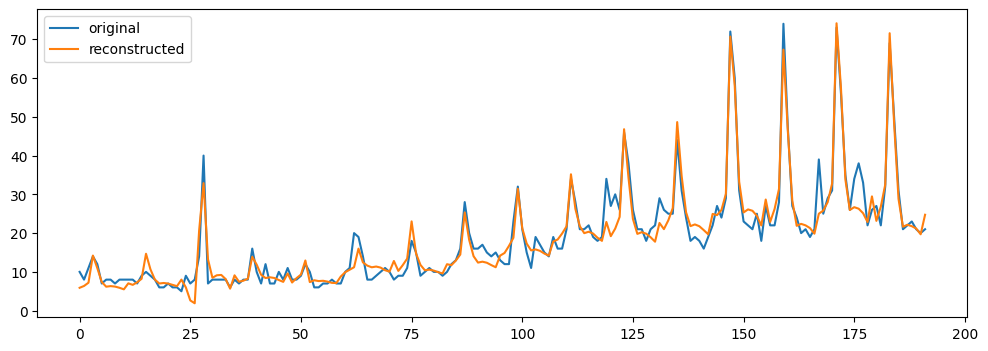

In [169]:
# reconstruction
P, V0, _ = hierarchical_svd(X=X, w_0=3, W=W, L=5, k=3)
X_re = (P@V0.T).flatten()

plt.figure(figsize=(12, 4))
plt.plot(X[0:len(X_re)], label='original')
plt.plot( X_re, label='reconstructed')
plt.legend()

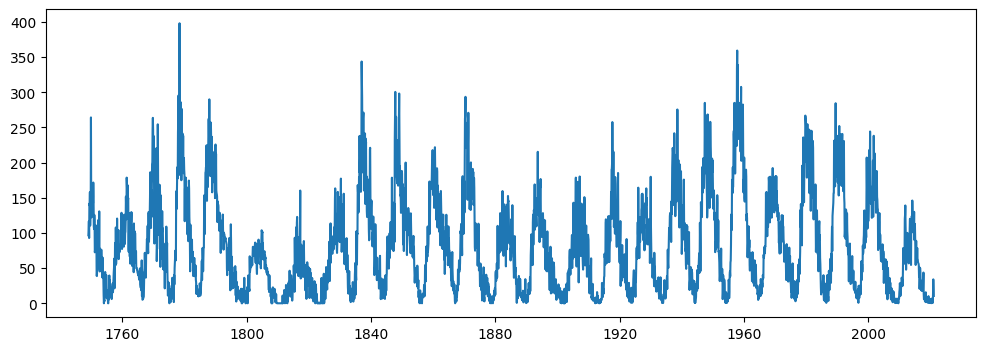

In [155]:
df = pd.read_csv('/content/Sunspots.csv')
X = df['Monthly Mean Total Sunspot Number'].values
plt.figure(figsize=(12, 4))
plt.plot(pd.to_datetime(df['Date']), df['Monthly Mean Total Sunspot Number'])

In [ ]:
X
X.shape

In [ ]:
print(X)

In [ ]:
# hyperparameters
k = 2
W = 2
w_0 = 4
L = 8

In [ ]:
# Power Profile
pi_dict = dict()
for w_0 in [4, 5, 6]:
    for k in [1, 2]:
        _, _, _pi_dict = hierarchical_svd(X, w_0, W, L, k)
        pi_dict.update(_pi_dict)
pi_dict = dict(sorted(pi_dict.items()))
plt.plot(pi_dict.keys(), pi_dict.values(), marker="D", markeredgecolor="blue", markerfacecolor="lightblue")

In [ ]:
# reconstruction
P, V0, _ = hierarchical_svd(X=X, w_0=5, W=W, L=5, k=3)
X_re = (P@V0.T).flatten()

plt.figure(figsize=(12, 4))
plt.plot(pd.to_datetime(df['Date']), df['Monthly Mean Total Sunspot Number'], label='original')
plt.plot(pd.to_datetime(df['Date'])[:len(X_re)], X_re, label='reconstructed')
plt.legend()

In [ ]:
# Figure.5
x = np.arange(0, 2000, 1)
sin_wave = np.sin(2*np.pi*x/50)
noise = np.random.normal(loc=5, scale=0.5, size=len(sin_wave))

In [ ]:
pi_list = []
for w in range(5, 401):
    _, _, _, pi = local_pattern(sin_wave+noise, w, 2)
    pi_list.append(pi)

In [ ]:
plt.plot(pi_list)

In [ ]:
# キーワード：「olympic」を解析
fn='/content/konan_movie.csv' # ファイル名を指定
#fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_olympic.csv'
index_col = 'Month' # インデックスを指定
df = pd.read_csv(fn, header=2, index_col=index_col, parse_dates=True)
df.plot(figsize=(8,2)) #可視化 (figure)

In [ ]:
X = df['number'].to_numpy()
len(X)

In [ ]:
pi_list1 = []
for w in range(5, 60):
    _, _, _, pi = local_pattern(X, w, 2)
    pi_list1.append(pi)

In [ ]:
plt.plot(pi_list1)

In [ ]:
X = df['number'].to_numpy()
X.shape

In [ ]:
# Power Profile
pi_dict = dict()
for w_0 in [4, 5, 6]:
    for k in [1, 2]:
        _, _, _pi_dict = hierarchical_svd(X, w_0, W, L, k)
        pi_dict.update(_pi_dict)
pi_dict = dict(sorted(pi_dict.items()))
plt.plot(pi_dict.keys(), pi_dict.values(), marker="D", markeredgecolor="blue", markerfacecolor="lightblue")